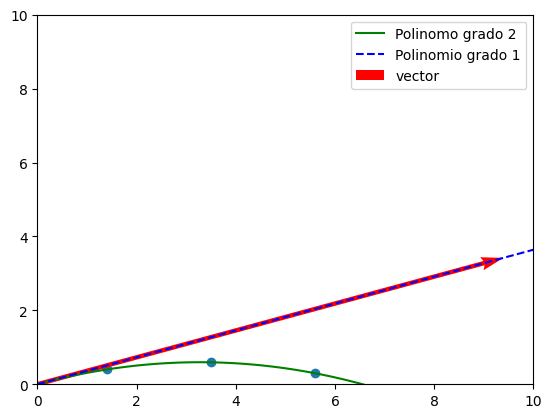

La magnitud del vector es: 10.0.
La dirección del vector es: 20.0°.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

def Lagrange(x,X,i):

  L = 1
  for j in range(len(X)):
    if i != j:
      L *= (x-X[j])/(X[i]-X[j])
  return L

def Interpolate(x,X,Y):

  Poly = 0
  for i in range(len(X)):
    Poly += Y[i]*Lagrange(x,X,i)
  return Poly

x = sym.Symbol("x",real=True)

X = np.array([1.4,3.5,5.6])
Y = np.array([0.4007954931819738,0.594128102489774,0.29802795523938164])
x_coords = np.linspace(0,10,100)
y_coords = Interpolate(x_coords,X,Y)

poly = Interpolate(x,X,Y)
poly = sym.expand(poly)
a = float(poly.coeff(x, 2))
b = float(poly.coeff(x, 1))
c = float(poly.coeff(x, 0))

y_recta = x_coords*b

theta = np.arctan(b)
magnitud = np.sqrt(-9.8/(2 * a * np.cos(theta)**2))
x_vector = magnitud*np.cos(theta)
y_vector = magnitud*np.sin(theta)

fig,ax = plt.subplots()
ax.scatter(X,Y)
ax.plot(x_coords,y_coords, color = "green", label="Polinomo grado 2")
ax.plot(x_coords,y_recta, color = "blue",label="Polinomio grado 1", linestyle="--")
ax.quiver(0,0,x_vector,y_vector,angles='xy', scale_units='xy', scale=1, color='red',width=0.009, label ="vector")
ax.set_xlim([0,10])
ax.set_ylim([0,10])
ax.legend()
plt.show()

print("La magnitud del vector es: " + str(round(magnitud,2)) + ".")
print("La dirección del vector es: " + str(round(theta*180/np.pi,2)) + "°.")